In [1]:
# 1) Load the breast_cancer dataset from skelarn (from sklearn.datasets import load_breast_cancer). 
# Split the dataset into training and test datasets. Scale the dataset using minmaxscaler. 
# Use KNeighborsClassifier classifier and report the score on the test dataset.

In [3]:
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=431)

In [9]:
scaler = MinMaxScaler()
scaler.fit(np.concatenate([X_train, X_test], axis=0))
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating KNNC
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_train_scaled, y_train), knn.score(X_test_scaled, y_test)

(0.9758241758241758, 0.9649122807017544)

In [10]:
# 2) Repeat Step 1 using pipelines and report the score.

In [11]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

# Fitting the pipeline t
pipeline.fit(np.concatenate([X_train, X_test]), np.concatenate([y_train, y_test]))
# Evalute pipeline on the test data
pipeline.score(X_test, y_test), pipeline.score(X_train, y_train)

(0.9912280701754386, 0.9758241758241758)

In [13]:
# 3) Use the pipeline object from Step 2 and make a grid search on parameter of number of neighbor.

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'knn__n_neighbors':  np.arange(1, 120)} # :(
grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_

({'knn__n_neighbors': 4}, 0.9714285714285713)

In [19]:
# 4) Import bike_day_raw.csv. Create a pipeline using ColumnTransformer, Scaling, and KNeighborsRegressor.

# Use `from sklearn.neighbors import KNeighborsRegressor'
# You need to split the data into X and y.
# Check the data shape
# Check the data types
# Print the column names of the data frame
# Create a scatterplot of each feature against the target variable (you may use clues our previous labs to do that)
# Create alist of features that are numeric and not numeric
# Create a pipeline of imputer and standard scaler for the numeric features
# Create a column transformer which uses the pipeline you created for numeric features and a onehotencoder for the non-numeric features
# You can create your column transformer in different ways
# Finally create a pipeline of column transformer and kNeighborsRegressor
# Split your data into train and test datasets
# Report the score on the test dataset

In [20]:
import pandas as pd 

df = pd.read_csv('bike_day_raw.csv')
df.sample(10)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
254,3,9,0,1,1,1,0.644348,0.602130,0.692174,0.088913,4713
702,4,12,0,1,1,1,0.452500,0.455796,0.767500,0.082721,6234
83,2,3,0,5,1,1,0.264167,0.256312,0.495000,0.230725,2210
588,3,8,0,6,0,2,0.692500,0.638267,0.732917,0.206479,6299
387,1,1,0,1,1,2,0.218333,0.243058,0.911250,0.110708,2432
239,3,8,0,0,0,1,0.707059,0.647959,0.561765,0.304659,4334
384,1,1,0,5,1,2,0.217500,0.220958,0.450000,0.202750,3163
96,2,4,0,4,1,1,0.437500,0.433696,0.602917,0.162312,3141
505,2,5,0,0,0,1,0.620833,0.583967,0.530417,0.254367,7129
382,1,1,0,3,1,1,0.303333,0.275254,0.443333,0.415429,3376


In [23]:
df = df.drop(["cnt"], axis=1)

In [24]:
df.sample(10)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
513,2,5,1,1,0,1,0.712500,0.679300,0.676250,0.196521
128,2,5,0,1,1,1,0.532500,0.525246,0.588750,0.176000
335,4,12,0,5,1,1,0.314167,0.331433,0.625833,0.100754
37,1,2,0,1,1,1,0.271667,0.303658,0.738333,0.045408
607,3,8,0,4,1,1,0.706667,0.652779,0.590417,0.077117
58,1,2,0,1,1,2,0.407273,0.400118,0.876364,0.289686
549,3,7,0,2,1,1,0.780833,0.702650,0.492083,0.126237
714,4,12,0,6,0,1,0.324167,0.338383,0.650417,0.106350
133,2,5,0,6,0,2,0.520833,0.500629,0.922500,0.134950
476,2,4,0,6,0,1,0.570000,0.542921,0.682917,0.283587


In [25]:
df.isnull().sum()


season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x27b8f4b0310>,
 'caps': [<matplotlib.lines.Line2D at 0x27b8f4b0820>,
 'boxes': [<matplotlib.lines.Line2D at 0x27b8f4b0160>,
 'medians': [<matplotlib.lines.Line2D at 0x27b8f4b0d60>,
 'fliers': [<matplotlib.lines.Line2D at 0x27b8f4b1000>,
 'means': []}

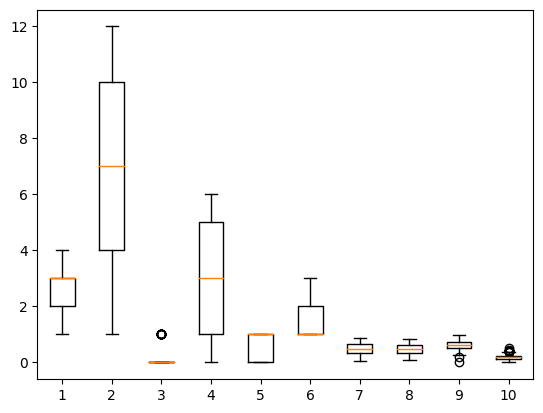

In [28]:
import matplotlib.pyplot as plt
plt.boxplot(df)

In [29]:
df.describe(include='all')

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486
std,1.110807,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463


In [33]:
cat = df.columns[:6]
num = df.columns[6:]

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], dtype='object')

In [ ]:
# encoding cat into special pipeline
